# Assignment 4 

## Team 17 - Shashank Siripragada, Sumit Patil

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### This csv file contains stocks from Apple, Tesla, Microsoft and Facebook

In [167]:
data = pd.read_csv('data/stock_data.csv', index_col=['Date'], parse_dates=['Date'])

In [168]:
data.Stock.unique()

array(['AAPL', 'TSLA', 'MSFT', 'FB'], dtype=object)

In [169]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Stock'], dtype='object')

Let's assign each stock values to the respective dataframes and look at the shapes, stock begin and end dates

In [170]:
data_aapl = data[data.Stock == 'AAPL']
data_msft = data[data.Stock == 'MSFT']
data_fb = data[data.Stock == 'FB']
data_tsla = data[data.Stock == 'TSLA']
 
print('Apple:', data_aapl.shape, 'Begin:', data_aapl.index[0].strftime('%m/%d/%Y'), 'End:', data_aapl.index[-1].strftime('%m/%d/%Y'), '\n')
print('Microsoft:', data_msft.shape, 'Begin:', data_msft.index[0].strftime('%m/%d/%Y'), 'End:', data_msft.index[-1].strftime('%m/%d/%Y'), '\n')
print('facebook:', data_fb.shape, 'Begin:', data_fb.index[0].strftime('%m/%d/%Y'), 'End:', data_fb.index[-1].strftime('%m/%d/%Y'),  '\n')
print('Tesla:', data_tsla.shape, 'Begin:', data_tsla.index[0].strftime('%m/%d/%Y'), 'End:', data_tsla.index[-1].strftime('%m/%d/%Y'), '\n')

Apple: (8364, 6) Begin: 09/07/1984 End: 11/10/2017 

Microsoft: (7983, 6) Begin: 03/13/1986 End: 11/10/2017 

facebook: (1381, 6) Begin: 05/18/2012 End: 11/10/2017 

Tesla: (1858, 6) Begin: 06/28/2010 End: 11/10/2017 



Apple we have **8364** data points beginning from 09/07/1984 and ending on 11/10/2017

For Microsoft, we have **7983** data points

Facebook **1381** data points and 

Tesla **1858** data points


Plot closing values of each stock vs. date

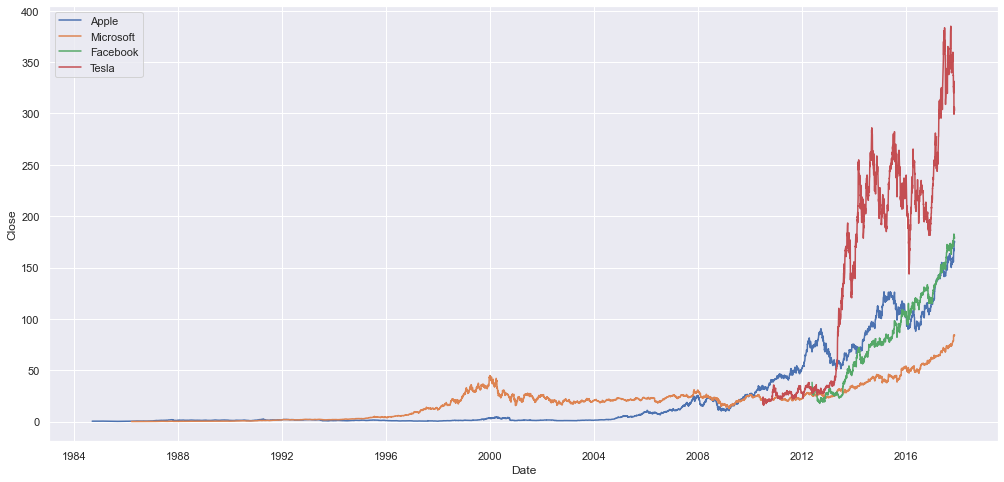

In [151]:
import matplotlib.pyplot as plt
%matplotlib inline

aapl_close = data_aapl['Close']
msft_close = data_msft['Close']
fb_close = data_fb['Close']
tsla_close = data_tsla['Close']

plt.figure(figsize=(17, 8))

plt.plot(aapl_close, label='Apple')
plt.plot(msft_close,label='Microsoft')
plt.plot(fb_close,label='Facebook')
plt.plot(tsla_close, label='Tesla')

plt.xlabel("Date")
plt.ylabel("Close")


plt.legend()
plt.show()

Let's reset the date based index to number index

In [152]:
data_aapl.reset_index(drop=True, inplace=True)
data_msft.reset_index(drop=True, inplace=True)
data_fb.reset_index(drop=True, inplace=True)
data_tsla.reset_index(drop=True, inplace=True)

Now for the modelling part, lets first begin with predicting stock value for the next day. The variable ndays controls the number of days in the future we want to predict the stock prize.

In [153]:
ndays = 1

Here we drop the column Stock as it just contains string referring to which stock the values belong to. We also drop the the column containing the close values of the stock.

In [171]:
data_aapl.drop(['Stock'], axis = 1, inplace = True)
data_msft.drop(['Stock'], axis = 1, inplace = True)
data_fb.drop(['Stock'], axis = 1, inplace = True)
data_tsla.drop(['Stock'], axis = 1, inplace = True)

data_aapl_final =  data_aapl.drop(['Close'], axis = 1)
data_msft_final = data_msft.drop(['Close'], axis = 1)
data_fb_final = data_fb.drop(['Close'], axis = 1)
data_tsla_final = data_tsla.drop(['Close'], axis = 1)

In [172]:
X = data_aapl_final.iloc[0:-ndays]
y = data_aapl.Close.shift(-ndays).dropna()

print(X.shape, y.shape)

(8363, 4) (8363,)


In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [158]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [160]:
rf_model.score(X_test, y_test)

0.9995172045110818

#### Let's increase the value of shift so that we can see how many days into the furtue we can predict with accuracy >= 70%

In [181]:
ndays_aapl = 2550
ndays_msft = 1000
ndays_fb = 1100
ndays_tsla = 1050

### Apple

Test score 0.7369488067605258 

Important Features
 [('Open', 0.6140334896180606), ('Low', 0.16122265363508942), ('Volume', 0.1345276292175271), ('High', 0.09021622752932304)]


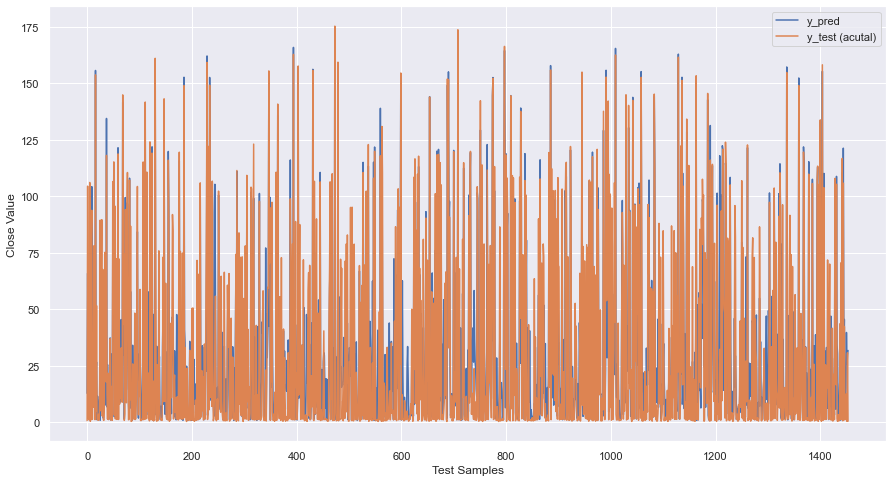

In [182]:
y = data_aapl.Close.shift(-ndays_aapl).dropna()
X = data_aapl_final.iloc[0:-ndays_aapl]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

print('Test score', rf_model.score(X_test, y_test), '\n')

print("Important Features\n", sorted(zip(X.columns, rf_model.feature_importances_),
        key=lambda x: x[1], reverse=True))

y_pred = rf_model.predict(X_test)
y_test = y_test.to_numpy()

plt.figure(figsize=(15, 8))
plt.plot(y_pred, label = 'y_pred')
plt.plot(y_test, label = 'y_test (acutal)')
plt.xlabel("Test Samples")
plt.ylabel("Close Value")

plt.legend()
plt.show()

For Apple, we can predict we can predict the value of stock after **2550** days with R2 value of 73% and the most important feature is column indicating **Opening value** of the stock for that day.

### Microsoft

Test score 0.7059572849369244 

Important Features
 [('Open', 0.5554981674501599), ('High', 0.1530003275006667), ('Low', 0.15130590080978404), ('Volume', 0.14019560423938932)]


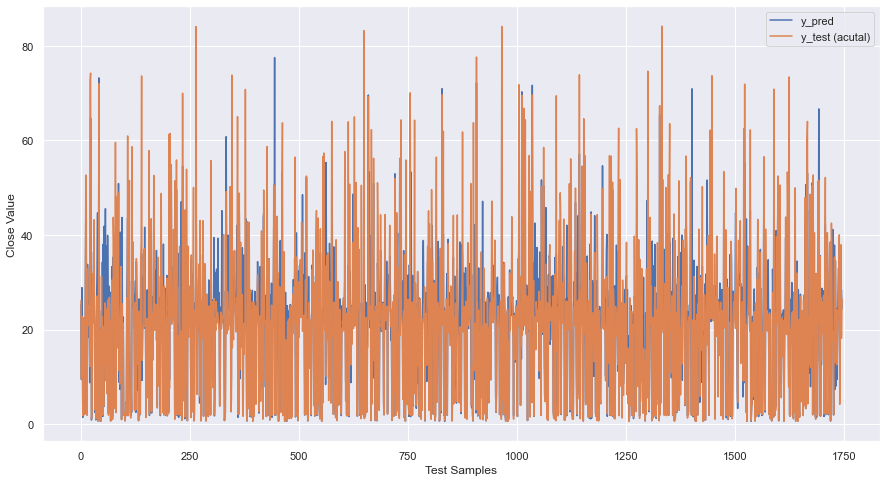

In [183]:
y = data_msft.Close.shift(-ndays_msft).dropna()
X = data_msft_final.iloc[0:-ndays_msft]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

print('Test score', rf_model.score(X_test, y_test), '\n')

print("Important Features\n", sorted(zip(X.columns, rf_model.feature_importances_),
        key=lambda x: x[1], reverse=True))

y_pred = rf_model.predict(X_test)
y_test = y_test.to_numpy()

plt.figure(figsize=(15, 8))
plt.plot(y_pred, label = 'y_pred')
plt.plot(y_test, label = 'y_test (acutal)')
plt.xlabel("Test Samples")
plt.ylabel("Close Value")

plt.legend()
plt.show()

For Miscrosoft, we can predict we can predict the value of stock after **1000** days with R2 value of 70% and the most important feature is column indicating **Opening value** of the stock for that day.

### Facebook

Test score 0.7008409867742218 

Important Features
 [('Low', 0.34939709230548904), ('High', 0.28700610596403975), ('Volume', 0.22555974697455317), ('Open', 0.1380370547559179)]


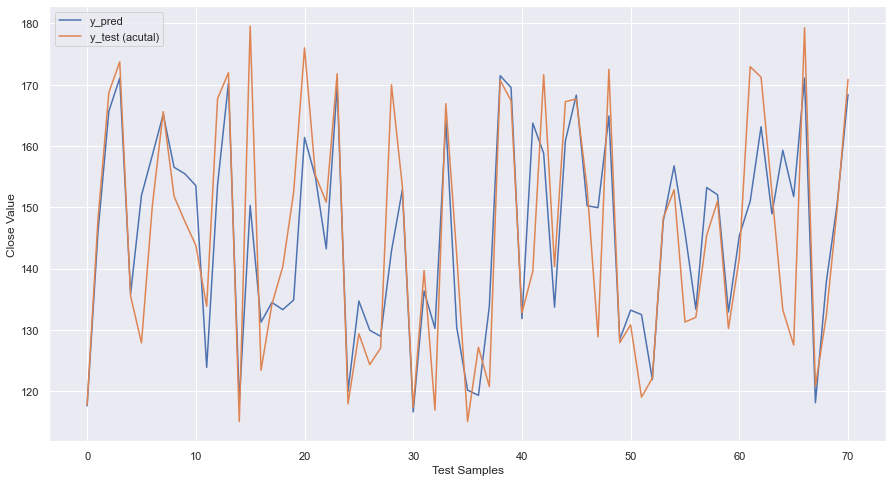

In [184]:
y = data_fb.Close.shift(-ndays_fb).dropna()
X = data_fb_final.iloc[0:-ndays_fb]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

print('Test score', rf_model.score(X_test, y_test), '\n')

print("Important Features\n", sorted(zip(X.columns, rf_model.feature_importances_),
        key=lambda x: x[1], reverse=True))

y_pred = rf_model.predict(X_test)
y_test = y_test.to_numpy()

plt.figure(figsize=(15, 8))
plt.plot(y_pred, label = 'y_pred')
plt.plot(y_test, label = 'y_test (acutal)')
plt.xlabel("Test Samples")
plt.ylabel("Close Value")

plt.legend()
plt.show()

For Facebook, we can predict we can predict the value of stock after **1100** days with R2 value of 70% and the most important feature is column indicating **Lowest value** of the stock for that day.

### Tesla

Test score 0.715000546581491 

Important Features
 [('Low', 0.3608072768134183), ('High', 0.3150400246839364), ('Open', 0.2510007158014052), ('Volume', 0.07315198270124018)]


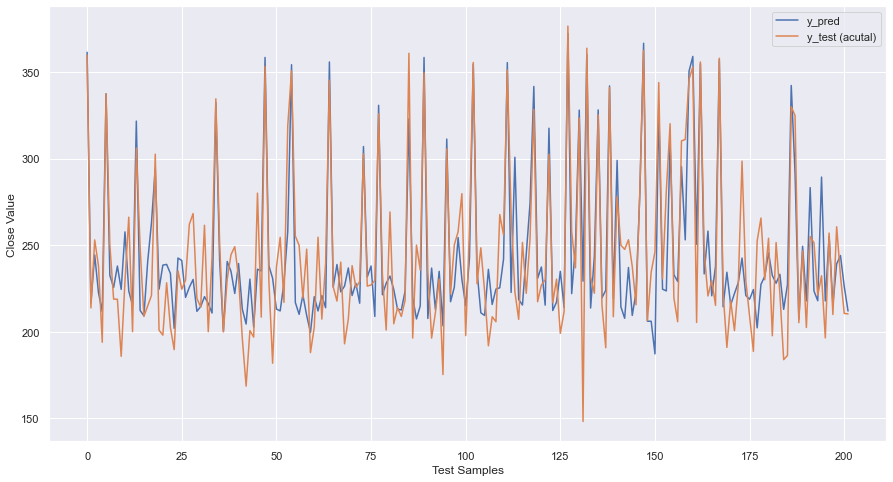

In [185]:
y = data_tsla.Close.shift(-ndays_tsla).dropna()
X = data_tsla_final.iloc[0:-ndays_tsla]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

print('Test score', rf_model.score(X_test, y_test), '\n')

print("Important Features\n", sorted(zip(X.columns, rf_model.feature_importances_),
        key=lambda x: x[1], reverse=True))

y_pred = rf_model.predict(X_test)
y_test = y_test.to_numpy()

plt.figure(figsize=(15, 8))
plt.plot(y_pred, label = 'y_pred')
plt.plot(y_test, label = 'y_test (acutal)')
plt.xlabel("Test Samples")
plt.ylabel("Close Value")

plt.legend()
plt.show()

For Tesla, we can predict we can predict the value of stock after **1050** days with R2 value of 71% and the most important feature is column indicating **Lowest value** of the stock for that day.